# Aprendizajo por Refuerzo - Una aproximación teórica

**Autores**: Iker Aguirre y Carlos Serrano

**Fecha:** 15/01/2021

## Tabla de Contenidos

1. [Introducción](#intro)

    1.1 [Elementos del aprendizaje por refuerzo](#elem)
    
    1.2 [Ejemplo : Tres en Raya](#raya)
    

2. [Métodos de Solución Tabular](#tabu)
    
    2.1 [Procesos finitos de Markov](#markov)
    
    2.2 [ Método de Monte Carlo](#monte)
    

3. [Métodos de Solución Aproximada](#aprox)
    
    3.1 [3.1 Predicción "on-policy" mediante aproximación](#onpolicy)


4. [Caso de estudio: Las Damas de Samuel](#samuel)


5. [Conclusiones](#conclu)


[Bibliografía](#biblio)

# 1. Introducción

<a id="intro"></a>

La interacción con el entorno es una forma muy importante de aprendizaje en el ser humano. Este es un proceso constante, donde el sujeto se tiene que adaptar continuamente a los estímulos de su entorno para lograr su objetivo, su recompensa. Cada acción que realizamos en nuestra vida diaria, conlleva una experiencia, que condicionará las decisiones que tomemos en el futuro. El sujeto, es decir, nosotros, deberemos ser capaces de asimilar esa experiencia para tomar decisiones que nos acerquen a nuestra recompensa cada vez más óptimas. Cómo de rápidos o eficientes seamos al comprender nuestro entorno, y actuar en consecuencia es un determinante de nuestra inteligencia. 
Este concepto es recogido por el aprendizaje por refuerzo.

El aprendizaje por refuerzo es aprender qué hacer, es decir, cómo conectar las situaciones a las acciones, para así, maximizar una señal de recompensa numérica. No se le dice al sujeto qué acciones debe llevar a cabo, este debe, en cambio, descubrir qué acciones producen la mayor recompensa al probarlas. En los casos más interesantes, las acciones pueden afectar no sólo a la inmediata, pero también la siguiente situación y, a través de ella, todas las recompensas posteriores. Estas dos características , es decir, prueba y error y recompensa retrasada, son las más importantes del aprendizaje por refuerzo.

#### Diferencias con otros tipos de aprendizaje

El aprendizaje por refuerzo es diferente del *aprendizaje supervisado*, que es el tipo de aprendizaje empleado sobre todo en las investigaciones que utilizan machine learning. El aprendizaje supervisado es el aprendizaje de un conjunto de respuestas conocidas proporcionados por un supervisor externo.

Cada ejemplo es una descripción de una situación junto con una especificación (la etiqueta) de las respuestas correctas que el sistema debe adoptar ante esa situación, que a menudo consiste en identificar un categoría a la que pertenece la situación. El objeto de este tipo de aprendizaje generalizar las respuestas del sistema de manera que actúe correctamente en situaciones que no haya visto anteriormente. 

Este es un tipo de aprendizaje importante, pero por sí solo no es adecuado para aprender de la interacción. En los problemas interactivos a menudo no es práctico obtener ejemplos de comportamiento deseado que sean a la vez correctos y representativos de todos los situaciones en las que el agente tiene que actuar. 

En un territorio inexplorado, donde uno esperaría aprovechar el aprendizaje al máximo, un agente debe ser capaz de aprender de su propia experiencia.


El aprendizaje por refuerzo también es diferente de lo que es el *aprendizaje no supervisado*, que normalmente consiste en encontrar estructuras ocultas en colecciones de datos no etiquetados. Parecería que los términos aprendizaje supervisado y aprendizaje no supervisado sirviesen para clasificar exhaustivamente los paradigmas encontrados en Machine Learning, pero no lo hacen. 

Aunque uno podría estar tentado de pensar en el aprendizaje por refuerzo como una especie de aprendizaje no supervisado porque no se basa en ejemplos de comportamiento correcto, el aprendizaje por refuerzo está intentando para maximizar recompensa en lugar de tratar de encontrar una estructura oculta. 

Descubrir una estructura en la experiencia de un agente puede ser ciertamente útil en el aprendizaje por refuerzo, pero no aborda por sí solo el problema de aprendizaje de refuerzo de maximizar la recompensa.


Por lo tanto, consideramos que el aprendizaje de refuerzo es un tercer paradigma del Machine Learning, junto con el aprendizaje supervisado y no supervisado y tal vez otros paradigmas.



### 1.1 Elementos del aprendizaje por refuerzo

<a id="elem"></a>

Más allá del agente y el entorno, se pueden identificar cuatro subelementos principales de un sistema de aprendizaje por refuerzo: una política, una recompensa, una función valor y, opcionalmente, un modelo de entorno.

- **Política**: define la manera de comportarse del agente en un momento dado. En términos generales, una política es una cartografía de los estados percibidos del medio ambiente a las medidas que deben adoptarse cuando se dan esos estados. Corresponde a lo que en psicología se llamaría un conjunto de reglas o asociaciones de estímulo-respuesta. En algunos casos, la política puede ser una simple función o tabla de búsqueda, mientras que en otros puede implicar un cálculo extenso como un proceso de búsqueda. La política es el núcleo de un agente de aprendizaje de refuerzo en el sentido de que por sí sola puede determinar el comportamiento. En general, las políticas pueden ser estocásticas, especificando probabilidades para cada acción.

- **Recompensa**: Una señal de recompensa define el objetivo de un problema de aprendizaje por refuerzo. En cada paso, el entorno devuelve un número llamado recompensa. El objetivo del agente es maximizar la recompensa total que recibe en el largo plazo. La señal de recompensa define así cuáles son los eventos buenos y malos para el agente. En un sistema biológico, podríamos pensar que las recompensas son análogas a las experiencias de placer o de dolor. Son los factores definitorios del problema al que se enfrenta el agente. La recompensa condiciona la selección de políticas; si una acción seleccionada por la política es seguida de un premio pequeño, entonces la política puede ser cambiada para que cuando se le presente la misma situación en el futuro, esta elija otra opción diferente. Las recompensas pueden ser funciones estocásticas representando el estado del entorno y las acciones tomadas.

- **Función-Valor**: define lo que es bueno a largo plazo. A grandes rasgos, el valor de un estado es la cantidad total de recompensa que un agente puede esperar acumular en el futuro, empezando desde ese estado. Mientras que las recompensas determinan la conveniencia inmediata e intrínseca de estados, los valores indican la conveniencia a largo plazo de los estados después de tomar en cuenta los estados que es probable que le sigan y las recompensas disponibles en esos estados. Por ejemplo, un estado siempre puede dar una baja recompensa inmediata pero aún así tener un alto valor porque es seguido por otros estados que producen altas recompensas. El contrario podría ser cierto también.

- **Modelo**: Esto es algo que imita el comportamiento del entorno, o más generalmente, eso permite hacer inferencias sobre cómo se comportará el ambiente. No se puede dar en todos los sistemas de aprendizaje por refuerzo. Por ejemplo, dado un estado y una acción, el modelo podría predecir el próximo estado resultante y la próxima recompensa. Los modelos se utilizan para la planificación, con lo que nos referimos a cualquier forma de decidiren un curso de acción considerando posibles situaciones futuras antes de que sean realmente experimentado. 

### 1.2. Ejemplo : Tres en Raya

<a id="raya"></a>

Para ilustrar la idea general del aprendizaje de refuerzo y contrastarla con otros enfoques, a continuación consideramos un ejemplo con detalle, como es el juego de las tres en raya.



<img src="tablero_3.PNG" alt="Drawing" style="width: 300px;"/>

Dos jugadores se turnan para jugar en un tablero de tres por tres. Un jugador juega Xs y las otras Os hasta que un jugador gane colocando tres marcas en una fila, horizontal, vertical o diagonal, como el jugador X tiene en el juego que se muestra arriba. Si el tablero se llena, y ninguno de los jugadores consigue tres en una fila, entonces habrá empate.

Debido a que un jugador hábil puede jugar para no perder nunca, asumamos que estamos jugando contra un jugador imperfecto, uno cuyo juego es a veces incorrecto y nos permite ganar. Por el momento, consideremos que los empates y las pérdidas son igualmente malos para nosotros. ¿Cómo podríamos construir un jugador que encuentre las imperfecciones en el juego de su oponente y aprenda a maximizar su posibilidades de ganar?

Aunque se trata de un problema simple, no puede ser resuelto fácilmente de manera satisfactoriaa través de las técnicas clásicas. Por ejemplo, la clásica solución "minimax" no sería correcta aquí porque asume una forma particular de juego por parte del oponente. Por ejemplo, un jugador de minimax nunca alcanzaría un estado de juego desde el cual pudiera perder, incluso si de hecho siempre gana desde ese estado debido al juego incorrecto del oponente. Métodos clásicos de optimización para problemas de decisión secuenciales, como programación dinámica, pueden computar una solución óptima para cualquier oponente, pero requiere
como entrada una especificación completa de ese oponente, incluyendo las probabilidades con las queel oponente hace cada movimiento en cada estado del tablero. Asumamos que esta informaciónno está disponible a priori para este problema, como no lo está para la gran mayoría de los problemas de interés práctico. Por otra parte, esa información puede estimarse a partir de la experiencia, en este caso jugando muchos juegos contra el oponente. 

Un método evolutivo aplicado a este problema buscaría directamente en el espacio de las posibles políticas una con una alta probabilidad de ganar contra el oponente. Aquí, una política es una regla que le dice al jugador qué movimiento debe hacer para cada estado del juego (cada posible combinación de Xs y Os en el tablero). Para cada política considerada, se obtendría una estimación de su probabilidad de ganar jugando un cierto número de juegos contra el oponente. Esta evaluación entonces dirigiría qué políticas se considerarán a continuación. Un método evolutivo típico escalaría en el espacio de políticas, generando y evaluando sucesivamente políticas en un intento de obtener mejoras incrementales. O, quizás, se podría usar un algoritmo de estilo genético que mantendría y evaluaría una población de políticas. Literalmente cientos de métodos de optimización diferentes se podrían aplicar.

Por otro lado, podríamos enfrentarnos al problema con un método que utilize la Función-Valor. Primero estableceríamos una tabla de números, una para cada posible estado del juego. Cada número será la última estimación de la probabilidad de que ganemos
desde ese estado. Tratamos esta estimación como el valor del estado, y toda la tabla es la función-valor aprendida. El estado A tiene un valor más alto que el estado B, o se considera "mejor" que el estado B, si la estimación real de la probabilidad de que ganemos de A es mayor que de B. Asumiendo que siempre jugamos con X, entonces para todos los estados con tres X seguidas
la probabilidad de ganar es de 1. De manera similar, para todos los estados con tres O en una fila, la probabilidad correcta es 0. Fijamos los valores iniciales de todos los demás estados en 0.5, lo que representa un supuesto de tener un 50% posibilidades de ganar.

A continuación, jugamos muchas partidas contra el oponente. Para seleccionar nuestras jugadas examinamos estados que resultarían de cada uno de nuestros posibles movimientos (uno por cada espacio en blanco en el tablero) y buscamos sus valores reales en la tabla. La mayoría de las veces movemos con intención de ganar, seleccionando el movimiento que lleva al estado de mayor valor, es decir, con la mayor probabilidad estimada de ganar. Ocasionalmente, sin embargo, seleccionamos al azar entre los otros movimientos en su lugar. Estos se llaman movimientos exploratorios porque generan una experiencia que de otra manera nunca veríamos. En la siguiente figura, podemos ver una secuencia de juego.

<img src="tres_en_raya_secuencia.PNG" alt="Drawing" style="width: 425px;"/>

Mientras jugamos, cambiamos los valores de los estados en los que nos encontramos durante la partida. Intentamos hacer estimaciones más precisas de las probabilidades de ganar. Para ello, concociendo el valor del estado después de cada movimiento pensado para ganar, retrocedemos hacia el estado antes del movimiento, como sugieren las flechas de la de arriba. Más precisamente, el el valor actual del estado anterior se actualiza para estar más cerca del valor del estado posterior.


Esto puede hacerse moviendo el valor del estado anterior una fracción del camino hacia el valor del estado posterior. Si dejamos que $S_{t}$ denote el estado antes del movimiento "competitivo", y $S_{t+1}$ el estado después del movimiento, la actualización al valor estimado de $S_{t}$, denotado $V (S_{t})$, puede escribirse como $$V (S_{t}) \leftarrow V(S_{t}) + \alpha[V (S_{t+1}) - V (S_{t})]$$


Donde $\alpha$ es una pequeña fracción positiva llamada *step-size parameter*, que influye en el ritmo de aprendizaje. Esta regla de actualización es un ejemplo de un aprendizaje *temporal-difference* llamado así porque sus cambios se basan en un diferencia, $V(S_{t+1}) - V(S_{t})$, entre estimaciones en dos momentos sucesivos.

El método descrito anteriormente funciona bastante bien en esta tarea. Por ejemplo, si el $\alpha$ se reduce adecuadamente con el tiempo, entonces este método converge, para cualquier oponente fijo, a las verdaderas probabilidades de ganar de cada estado dado nuestro jugador juegue de manera óptima. Además, los movimientos que se hacen entonces (excepto en los movimientos exploratorios) son de hecho, los movimientos óptimos contra este (imperfecto) oponente. En otras palabras, el método converge en una política óptima para jugar contra este oponente. Si el tamaño del paso no se reduce hasta cero con el tiempo, entonces este jugador también juega bien contra oponentes que cambian lentamente su forma de jugar.

# 2. Métodos de Solución Tabular

<a id="tabu"></a>

A continuación, vamos a repasar algunas ideas importantes y representar con ejercicios algunos de los algoritmos más sencillos del aprendizaje de refuerzo.Estos son aquellos en los que los espacios de estado y acción son lo suficientemente pequeños como para que las funciones-valor se representen como matrices o tablas. En en este caso, los métodos a menudo pueden encontrar soluciones exactas, es decir, a menudo pueden encontrar exactamente la función-valor óptima y la política óptima. Esto contrasta con los métodos de aproximación descritos en el siguiente apartado, que sólo encuentran soluciones aproximadas.

En concreto vamos a hablar de dos de los métodos más conocidos como son los procesos finitos de Markov y el método de Monte Carlo

## 2.1.  Procesos finitos de Markov

<a id="markov"></a>

Los PDM (Procesos de Decisión de Markov) son una formalización clásica de la toma de decisiones secuenciales, donde las acciones influyen no sólo en las recompensas inmediatas, sino también en las situaciones posteriores, o estados, y a través de esas futuras recompensas. Así, los PDM implican una recompensa retrasada y la necesitan intercambiar recompensa inmediata y diferida.

Para enterlo mejor, podemos utilizar con un ejemplo:

#### Ejemplo aplicado a Python

Supongamos que Juan acaba de mudarse a Madrid y no conoce la ciudad. Quiere ir desde su casa hasta el trabajo en metro, pero no sabe el camino. Lo único que sabe es que tendrá que hacer varios transbordos para llegar a su destino final. 

Juan aprenderá a llegar al trabajo a base de intentar ir repetidas veces, siempre con un margen de tiempo para no llegar tarde. Por ello, ha representado un mapa de 8 puntos que recoge todas las rutas que podría seguir, siendo el punto 0 su casa, el 7 su lugar de trabajo, y el resto de puntos representando los distintos trasbordos que deberá hacer.

In [115]:
import numpy as np
import pylab as plt

puntos = [(0,1),(1,2),(2,3),(2,4),(1,5),(5,6),(5,7)]
meta = 7

Utilizamos el paquete "networkx" para representar el mapa.

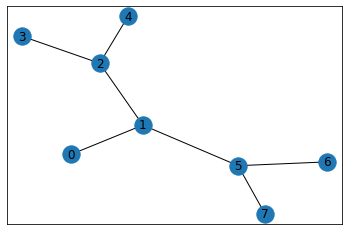

In [99]:
import networkx as nx

mapa = nx.Graph()
mapa.add_edges_from(puntos)
posicion = nx.spring_layout(mapa)
nx.draw_networkx_nodes(mapa,posicion)
nx.draw_networkx_edges(mapa,posicion)
nx.draw_networkx_labels(mapa,posicion)
plt.show()

Como podemos observar, el trayecto óptimo es bastante claro: (0, 1, 5, 7). La idea es que esa sea la ruta que Juan acabe tomando siempre para ir al trabajo.

A continuación, creamos el gráfico de recompensas, el cual representaremos como una matriz R. Dado que nuestro mapa consta de 8 puntos, tendrá unas dimensiones de 8x8. Inicialmente los valores de la matriz serán todos -1. Sin embargo, a medida que se vayan tomando decisiones adecuadas estos variarán. En concreto, adoptarán el valor 0 si se escoge una ruta aceptable, y el valor 100 si se está siguiendo la ruta óptima.

In [119]:
MATRIX_SIZE = 8

R = np.matrix(np.ones(shape = (MATRIX_SIZE,MATRIX_SIZE)))
R *= -1

In [121]:
MATRIX_SIZE = 8
R = np.matrix(np.ones(shape = (MATRIX_SIZE,MATRIX_SIZE)))
R *= -1

for punto in puntos:
    print(punto)
    if punto[1] == meta:
        R[punto]=100
    else:
        R[punto]=0

    if point[0] == meta:
        R[punto[::-1]]=100
    else:
        R[punto[::-1]]=0

R[meta,meta]= 100
R

(0, 1)
(1, 2)
(2, 3)
(2, 4)
(1, 5)
(5, 6)
(5, 7)


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,   0.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,  -1.,  -1.,   0., 100.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1., 100.]])

A continuación, creamos la matriz Q y la función "acciones_posibles", la cual recogerá todos los movimientos posibles que Juan podrá hacer a partir de un punto de transbordo. Por ejemplo, en el punto 1 solo podrá ir al punto 2 o el punto 5. La matriz Q nos indicará cómo de buena es cada ruta tomada.

In [122]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

gamma = 0.8

estado_inicial = 1

def acciones_posibles(state):
    fila_estado_actual = R[state,]
    av_accion = np.where(fila_estado_actual >= 0)[1]
    return av_accion

act_posible = acciones_posibles(estado_inicial)

La función "proxima_accion" genera una accion aleatoria.

In [107]:
def proxima_accion(available_actions_range):
    accion_elegida = int(np.random.choice(act_posible,1))
    return accion_elegida

action = proxima_accion(act_posible)

Por último, definimos la función "update" mediante la cual se irá actualizando la matriz de Q, acumulando valores en las distintas rutas, siendo las de mayor valor las que compongan la ruta óptima,

In [110]:
def update(estado_actual, action, gamma):

  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]

  Q[estado_actual, action] = R[estado_actual, action] + gamma * max_value
  print('max_value', R[estado_actual, action] + gamma * max_value)

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(estado_inicial, action, gamma)

max_value 0.0


0

Creamos una funcion de training y de test.

En el training, Juan realizará 1000 repeticiones con las 3 funciones anteriores, e incluirá una puntuación a cada repetición en función de lo buena que haya sido la ruta.

In [123]:
scores = []
for i in range(1000):
    estado_actual = np.random.randint(0, int(Q.shape[0]))
    act_posible = acciones_posibles(estado_actual)
    action = proxima_accion(act_posible)
    score = update(estado_actual,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 180.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 244.0
Score: 173.77049180327867
max_value 195.20000000000002
Score: 253.77049180327867
max_value 195.20000000000002
Score: 253.77049180327867
max_value 0.0
Score: 253.77049180327867
max_value 0.0
Score: 253.77049180327867
max_value 0.0
Score: 253.77049180327867
max_value 244.0
Score: 253.77049180327867
max_value 0.0
Score: 253.77049180327867
max_value 0.0
Score: 253.77049180327867
max_value 195.20000000000002
Score: 333.7704918032787
max_value 0.0
Score: 333.7704918032787
max_value 0.0
Score: 333.7704918032787
max_value 195.20000000000002
Score: 333.7704918032787
max_value 0.0
Score: 333.770491

max_value 203.87879852545376
Score: 980.4397346252792
max_value 318.5606226960215
Score: 980.4397346252792
max_value 399.07879852545375
Score: 980.4397346252792
max_value 203.87879852545376
Score: 980.8186236726094
max_value 498.8484981568172
Score: 980.8763316664912
max_value 399.07879852545375
Score: 980.8763316664912
max_value 499.07879852545375
Score: 980.4698504765361
max_value 254.8484981568172
Score: 980.4698504765361
max_value 399.07879852545375
Score: 980.4698504765361
max_value 318.5606226960215
Score: 980.4698504765361
max_value 254.8484981568172
Score: 980.9432432373263
max_value 399.07879852545375
Score: 980.9432432373263
max_value 399.07879852545375
Score: 980.9432432373263
max_value 254.8484981568172
Score: 980.9432432373263
max_value 399.07879852545375
Score: 980.9432432373263
max_value 254.8484981568172
Score: 980.9432432373263
max_value 399.07879852545375
Score: 980.9432432373263
max_value 499.263038820363
Score: 980.6181535945683
max_value 203.87879852545376
Score: 9

max_value 204.73669551670082
Score: 982.557231107687
max_value 255.92086939587603
Score: 982.557231107687
max_value 255.92086939587603
Score: 982.557231107687
max_value 255.92086939587603
Score: 982.557231107687
max_value 399.97407048364073
Score: 982.571828801724
max_value 399.97407048364073
Score: 982.571828801724
max_value 255.92086939587603
Score: 982.571828801724
max_value 204.73669551670082
Score: 982.571828801724
max_value 399.97407048364073
Score: 982.571828801724
max_value 255.92086939587603
Score: 982.571828801724
max_value 399.97407048364073
Score: 982.571828801724
max_value 255.92086939587603
Score: 982.571828801724
max_value 319.9792563869126
Score: 982.5835069569537
max_value 399.97407048364073
Score: 982.5835069569537
max_value 319.90108674484503
Score: 982.5835069569537
max_value 319.90108674484503
Score: 982.5835069569537
max_value 319.9792563869126
Score: 982.5835069569537
max_value 319.90108674484503
Score: 982.5835069569537
max_value 319.90108674484503
Score: 982.58

Aplicamos la función de test que nos dará la ruta óptima.

In [124]:
estado_actual = 0
steps = [estado_actual]

while estado_actual != 7:

    next_step_index = np.where(Q[estado_actual,]== np.max(Q[estado_actual,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index =int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    estado_actual = next_step_index

print("Most efficient path:")
print(steps)

Most efficient path:
[0, 1, 5, 7]


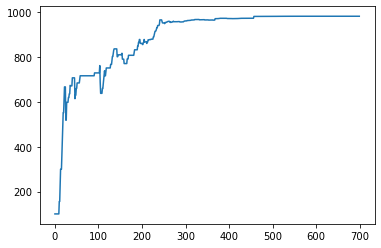

In [114]:
plt.plot(scores)
plt.show()

Como podemos ver, aproximadamente en el intento 300 Juan ha aprendido exactamente cual es su ruta al trabajo.

## 2.2. Método de Monte Carlo

<a id="monte"></a>

Los métodos de Monte Carlo sólo requieren una muestra de *experiencia*, es decir, secuencias de estados, acciones y recompensas de la interacción real o simulada con el entorno. Aprender de experiencia real es sorprendente porque aunque no requiere ningún tipo de conocimiento de la dinámica del ambiente, puede lograr un comportamiento óptimo. El aprendizaje de experiencia simulada también es poderoso. Aunque se requiere un modelo, el modelo sólo necesita generar transiciones de la muestra, no las distribuciones de probabilidad completas de todas las posibles transiciones, como por ejemplo, se requieren para la programación dinámica (PD). En muchos casos, es fácil generar experiencia muestreada según las distribuciones de probabilidad deseadas,
pero no es posible obtener las distribuciones de forma explícita.

De nuevo, realizamos un ejemplo para la mejor comprensión:

#### Ejemplo aplicado a Python

Supongamos que Juan lleva ya varios meses viviendo en la ciudad y, para despejarse, tiene ahora por costumbre darse un paseo a la vuelta del trabajo. Puesto que está sometido a mucho estrés, no puede evitar pensar en los proyectos que tiene pendientes, y no es la primera vez que acaba alejándose tanto de su casa que tiene que volver en autobús. Juan considera que se encuentra a una distancia alejada cada vez que, una vez finalizado su paseo, esté a más de 4 manzanas de su punto de partida. 

Nos interesa estudiar cuál es la mayor distancia que, de media, podrá recorrer sin tener que coger el autobús. 

Para esta simulación de Monte Carlo debemos tener en cuenta varios puntos:

1. Consideraremos la máxima distancia permitida aquella que, en más de la mitad de las veces, le permita volver andando a casa.


2. Cabe recordar que Juan se encuentra en el centro de la ciudad. Por lo tanto, el mapa tendrá forma de cuadrícula, representando cada uno de los cuadrados una manzana distinta. 


3. Cada vez que Juan llegue a una intersección, tendrá que elegir entre 4 direcciones posibles: Norte, Sur, Este u Oeste. Es posible que vuelva hacia atrás.


4. En la simulación mediremos la distancia andada en "manzanas recorridas", que recoge el número de veces que Juan ha andado la distancia de un lado de una manzana. Es decir, si Juan diera la vuelta entera a una manzana, contaríamos que ha andado la distancia de 4 manzanas.


5. Juan cojerá el autobús siempre que, una vez finalizado su trayecto, se encuentre a una distancia superior a 4 manzanas. Puede darse el caso de que haya podido andar, por ejemplo, una distancia de 30 bloques, pero que al acabar el paseo se encuentre a tan solo 2 de su punto de partida. En ese caso, no haría uso de transporte público para volver a casa.

Cargamos el paquete random.

In [ ]:
import random

Creamos la función "paseo_aleatorio", para medir la distancia andada. Utilizamos x e y, los cuales añadirán y sustraerán valores en función de la dirección cardinal que Juan tome en cada intersección. Por ejemplo, si toma la dirección Norte, el valor de la "x" permanecerá igual, y a la "y" se le sumará un 1. Usamos también x += dx, que es lo mismo que x = x + dx, para actualizar el valor de cada dirección tomada.

In [70]:
def paseo_aleatorio(n):
    """Devolver coordenadas tras 'n' manzanas recorridas"""
    x, y = 0, 0
    for i in range(n):
        (dx, dy) = random.choice ([(0, 1), (0, -1), (1, 0), (-1, 0)])
        x += dx 
        y += dy
    return(x, y)

Seleccionamos un número de 1000 paseos con los que realizar la simulación.

In [71]:
numero_de_paseos = 1000

A continuación, estudiamos las probabilidad de que Juan tenga que coger el autobús al recorrer una distancia de 1 a 50 bloques. creamos un bucle que compute las veces que la distancia a la que se encuentre Juan al finalizar su paseo sea igual o inferior a 4 bloques, sumando un valor 1. Al final, se contabilizarán las veces que vuelve andando a casa para cada distancia recorrida, dividido en el total de veces que recorre esa distancia.

In [68]:
for distancia_paseo in range(1, 50):
    vuelta_andando = 0
    for i in range(numero_de_paseos):
        (x, y) = paseo_aleatorio(distancia_paseo)
        distancia = abs(x) + abs(y)
        if distancia <= 4:
            vuelta_andando += 1
    tasa_vueltas_andando = float(vuelta_andando)/numero_de_paseos
    print("Manzanas recorridas =",
         distancia_paseo,
         "/ sin usar transporte público =",
         100*tasa_vueltas_andando)

Manzanas andadas = 1 / sin usar transporte público = 100.0
Manzanas andadas = 2 / sin usar transporte público = 100.0
Manzanas andadas = 3 / sin usar transporte público = 100.0
Manzanas andadas = 4 / sin usar transporte público = 100.0
Manzanas andadas = 5 / sin usar transporte público = 88.9
Manzanas andadas = 6 / sin usar transporte público = 95.3
Manzanas andadas = 7 / sin usar transporte público = 76.6
Manzanas andadas = 8 / sin usar transporte público = 86.3
Manzanas andadas = 9 / sin usar transporte público = 68.4
Manzanas andadas = 10 / sin usar transporte público = 79.4
Manzanas andadas = 11 / sin usar transporte público = 58.3
Manzanas andadas = 12 / sin usar transporte público = 73.3
Manzanas andadas = 13 / sin usar transporte público = 55.00000000000001
Manzanas andadas = 14 / sin usar transporte público = 66.4
Manzanas andadas = 15 / sin usar transporte público = 47.199999999999996
Manzanas andadas = 16 / sin usar transporte público = 62.8
Manzanas andadas = 17 / sin usar t

En este caso, la máxima distancia que podrá recorrer sin tener que volver en autobús es 22 manzanas.

# 3. Métodos de Solución Aproximada

<a id="aprox"></a>

Los métodos de solución Tabular pueden ser limitados, porque cuando estamos tratando con espacios muy grandes, no es posible encontrar una política óptima o la función-valor óptima. Nuestro objetivo, en cambio, es encontrar una buena solución aproximada usando recursos computacionales limitados. A continuación se explicarán algunos de estos métodos de forma teórica. 

## 3.1 Predicción "on-policy" mediante aproximación

<a id="onpolicy"></a>

Este método va a considerar la estimación la función que devuelve el valor del estado con data "on-policy", esto es,
aproximar $\upsilon_{\pi}$ a partir de la experiencia generada mediante una política conocida $\pi$. La novedad es que la función de valor aproximada se representa no como una tabla sino como un forma funcional parametrizada con vector de peso $w\in \mathbb{R}^d$. Escribimos $\hat{\upsilon}(s,w) \approx \upsilon_{\pi}(s)$, para el valor aproximado del estado $s$ dado el vector de pesos $w$

A continuación, debemos tener en cuenta la optimización de la función-valor, pero además, en este apartado, trataremos de encontrar un valor óptimo para la Predicción $(\overline{VE})$, obtenida de la siguiente forma $$\overline{VE}(w) = \sum_{s\in S}\mu(s)[\upsilon_{\pi} - \hat{\upsilon}(s,w)]^2 $$

Con estos componentes, pasaríamos obtener una solución óptima mediante técnicas basadas en descenso de gradiente estocástico. Como la notación matemática para la explicación de estos métodos, proporcionaremos un pseucódigo para estimar correctamente $\hat{\upsilon} \approx \upsilon_{\pi}$

Primero utilizaremos el algoritmo de gradiente de Monte Carlo. 

Tendríamos dos inputs:

La política $\pi$ que va a ser evaluada

Una función diferenciable $\hat{\upsilon} : S \times \mathbb{R}^d \rightarrow \mathbb{R}$

El parámetro del algoritmo: el tamaño del paso $\alpha > 0$

Inicializamos los pesos de la función valor arbitrariamente $w = 0$

Hacemos un loop para cada episodio:

   Generamos un episodio $S_{0}, A_{0}, R_{1}, S_{1}, A_{1},..., R_{T}, S_{T}$ utilizando $\pi$
    
   Bucle para cada paso: $t = 0,1..., T-1:$
        $w \leftarrow w + \alpha[G_{t} - \hat{\upsilon}(S_{t},w)]\nabla\hat{\upsilon}(S_{t},w)$

En oposición a estos, existirían los métodos de bootstrapping. Aunque los métodos de semi gradiente (bootstrapping) no convergen con tanta fuerza como los métodos de gradientes, convergen de manera fiable en casos importantes como el caso lineal. Además, ofrecen importantes ventajas que los hacen a menudo, la opción preferida. Una razón para ello es que normalmente permiten una mayor rapidez de aprendizaje. Otra es que permiten aprender a ser continuo y en línea, sin esperar el final de un episodio. Esto les permite ser utilizados en problemas continuos y proporciona ventajas computacionales

# 4. Caso de estudio: Las Damas de Samuel

<a id="samuel"></a>

Arthur Samuel fue uno de los primeros en hacer uso de métodos de búsqueda heurística y de lo que ahora llamaríamos aprendizaje temporal-difference. Sus jugadores de damas son casos de estudio instructivos además de ser de interés histórico.

Samuel usó dos métodos principales de aprendizaje, el más simple de los cuales lo llamó aprendizaje de memoria. Consistía simplemente en guardar una descripción de cada posición del tablero encontrada durante la partida junto con su valor de respaldo determinado por el procedimiento minimax. El resultado fue que si una posición que ya se había encontrado fuese a ocurrir de nuevo como una posición terminal de un árbol de búsqueda, la profundidad de la búsqueda sería amplificada porque el valor de esta posición ya ha registrado los resultados de una o más búsquedas realizadas anteriormente. El problema inicial fue que el programa no fue diseñado a encontrar el camino más rápido a la victoria. 

El aprendizaje de memoria produjo una lenta pero continua mejora, siendo más efectivo para las fases de apertura y final de partida. Su programa acabó consiguió ser mejor que la media tras aprender practicando muchas partidas contra sí mismo, oponentes humanos, y de partidas históricas con aprendizaje supervisado.

El aprendizaje de memoria y otros aspectos del trabajo de Samuel se inclinan fuertemente hacia la idea esencial del aprendizaje temporal-difference, es decir, que el valor de un estado debe ser igual al valor de siguientes estados más probables. Samuel se acercó más a esta idea en su segundo método de aprendizaje, su procedimiento de "aprendizaje por generalización" para modificar los parámetros de la función-Valor. . Jugó a su programa muchos juegos contra otra versión de sí mismo y
realizó una actualización después de cada movimiento. 

La idea de la actualización de Samuel está representada la figura más abajo mostrada. Cada círculo abierto representa una posición donde el programa mueve a continuación, una posición en movimiento, y cada círculo sólido representa una posición donde el oponente moverá a continuación. Cuando mueven los dos lados, el valor de cada posición en movimiento se actualiza, lo que resulta en una segunda posición en movimiento. La actualización se realiza hacia el valor minimax de una búsqueda lanzada desde la segunda posición en movimiento. Por lo tanto, el valor total del efecto la vuelta tras un movimiento completo sobre los eventos reales, y, a partir de ahí, trasladarse a eventos posibles


<img src="Caso_Samuel.PNG" alt="Drawing" style="width: 450px;"/>

Sin embargo, al método de aprendizaje de Samuel le puede haber faltado una parte esencial de un buen de algoritmo temporal-difference . El aprendizaje de temporal-difference puede ser visto como una forma de hacer una función-valor coherente con ella misma, y esto lo podemos ver claramente en el método de Samuel. Pero también se necesita una forma de vincular la función-valor al verdadero valor de los estados. Esto se puede forzar aplicando recompensas y descontando o dando un valor fijo al estado terminal. Pero el método de Samuel no incluía recompensas ni un tratamiento especial de las posiciones terminales de las partidas. 

# 5. Conclusiones

<a id="conclu"></a>

Como hemos visto, el aprendizaje por refuerzo tiene aplicaciones muy importantes, ya que casi todas las incógnitas reales podrían ser escudriñadas a través del prisma de algún método que utilice este tipo de aprendizaje. Esto es así, porque las acciones están constantemente determinadas por los estímulos del entorno, y, por lo tanto podríamos situar el problema en un planteamiento de aprendizaje por refuerzo.

A lo largo de esta exposición teórica de este tipo de aprendizaje, hemos visto por un lado, apoyados en ejemplos aclaratorios con código pyhton, dos de los métodos tabulares más conocidos. La simpleza de los métodos tabulares nos ha permitido plasmarlo mejor con ejemplo de código. Mientras que, por otro lado, hemos rascado en la superficie de otros métodos más complejos como son los de estimación aproximada, en un modesto acercamiento a los métodos "on-policy"

Además de manera teórica, hemos visto algunos ejemplos en los que se ha utilizado métodos de aprendizaje por refuerzo, que nos han ayudado a comprender mejor la idiosincrasia de este tipo de aprendizaje.

Aunque no era el objetivo de este trabajo, el camino por explorar, dentro de las cosas que se han hablado, y sobre todo, de las que se han omitido, es muy extenso. En cualquier caso, este documento puede servir de un buen punto de partida para la investigación más exhaustivo sobre un mundo que puede tener implicaciones prácticas muy interesantes.

# Bibliografía

<a id="biblio"></a>

- https://towardsdatascience.com/reinforcement-learning-on-policy-function-approximation-2f47576f772d

- https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/blob/master/chapter09/square_wave.py

- Busoniu, Lucian; Babuska, Robert; De Schutter, Bart; Ernst, Damien (2010). Reinforcement Learning and Dynamic Programming using Function Approximators. Taylor & Francis CRC Press. ISBN 978-1-4398-2108-4

- Sutton, Richard S.; Barto, Andrew G. (2018). Reinforcement Learning: An Introduction (2ed.). MIT Press. ISBN 978-0-262-03924-6.

- https://towardsdatascience.com/reinforcement-learning-in-a-few-lines-of-code-d6c8af1e0fd2